In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.mixture import GaussianMixture
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.stats import mode
from sklearn.metrics import accuracy_score

# Clustering mit Gaussian

In [2]:
#Datenset eingelesen
data = pd.read_csv("data/zip.train", header=None, sep=" ")

In [3]:
cleaned_data = data.iloc[:,:-1]

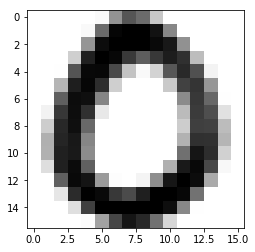

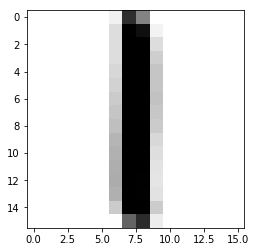

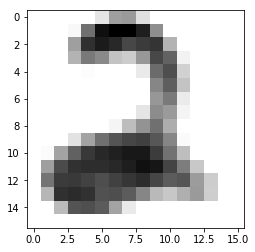

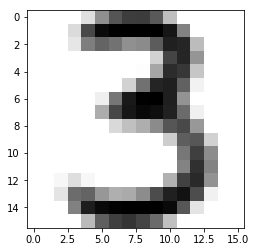

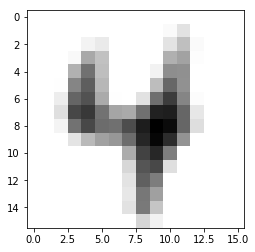

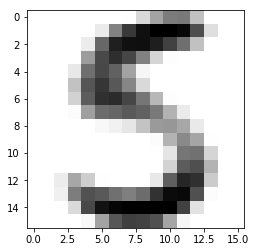

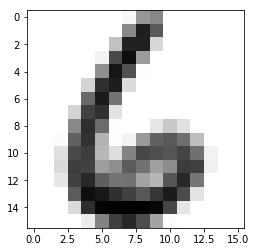

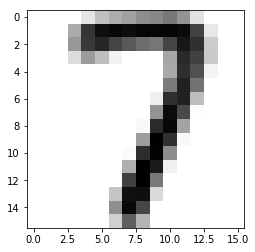

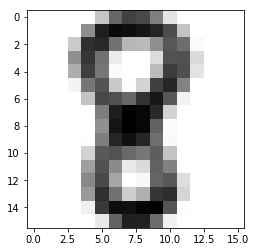

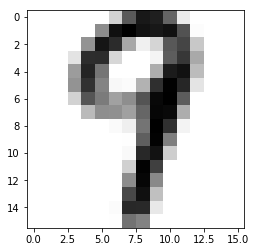

In [4]:
#den Median über alle einzelnen Zahlen jeder Ziffer als Bild darstellen

def number_figure(n):
    number = pd.DataFrame(cleaned_data[cleaned_data[0] == n].iloc[:,1:])
    number_median = number.median()
    image_reshape = number_median.values.reshape((16,16))
    plt.imshow(image_reshape, cmap=plt.cm.binary, interpolation="none")
    return plt.show()

numbers = range(0,10)

for n in numbers:
    number_figure(n)

In [5]:
#Berechnung der Mediane über alle Zahlen jeder Ziffer

def number_median(n):
    number = pd.DataFrame(cleaned_data[cleaned_data[0] == n].iloc[:,1:])
    return number.median()

mediane = []

for number in range(0,10):
    mediane.append(number_median(number))

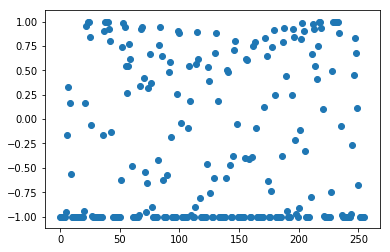

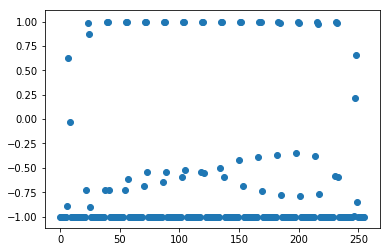

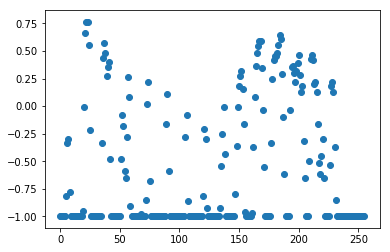

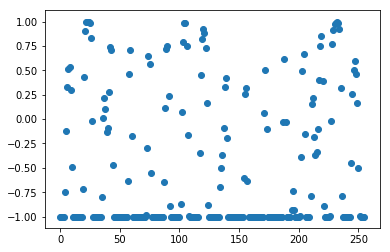

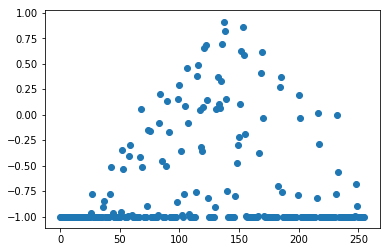

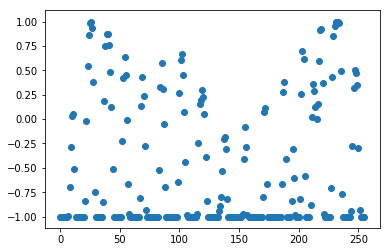

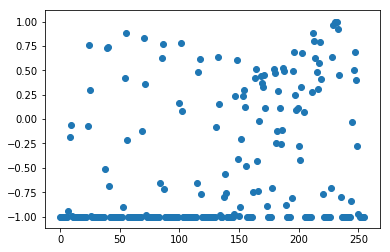

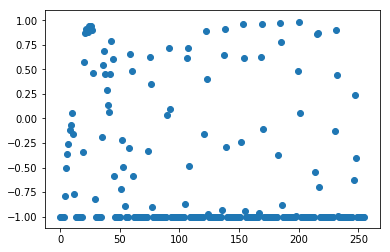

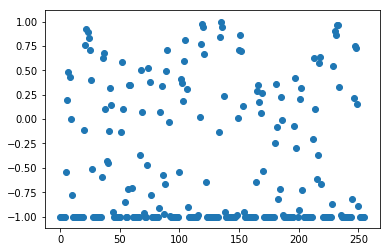

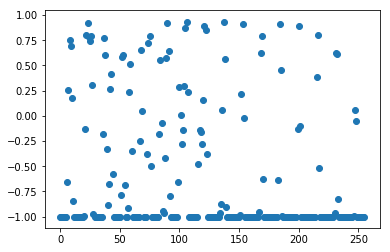

In [6]:
#Darstellung der Mediane der Zahlen jeder Ziffer in Form von Dotplots mit den Pixel auf der x-Achse

x_werte = range(0,256)

def scatter_plots(n):
    plt.scatter(x_werte,n)
    return plt.show()
    
for median in mediane:
    scatter_plots(median)

In [7]:
#Entfernung der ersten Spalte, in der die dargestellte Zahl steht
superclean_data = cleaned_data.iloc[:,1:]

#Berechnung der Gaussian Mixture aller Zahlen
mixture = GaussianMixture(n_components=10, covariance_type='full', n_init=2, random_state=1).fit(superclean_data)

In [8]:
#Kopieren von cleaned_data, damit das df unverändert bleibt
cleaned_data_mixture = pd.DataFrame.copy(cleaned_data,deep=True)

#Anfügen der Cluster-Wahrscheinlichkeiten (pd_mixture_probs) und des ausgewählten Clusters ('mixture') an ursrpüngliche Daten
mixture_probs = pd.DataFrame(mixture.predict_proba(superclean_data))
pd_mixture_probs = mixture_probs.rename(columns ={0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9'})
cleaned_data_results = pd.concat((cleaned_data_mixture,pd_mixture_probs), axis=1)
cleaned_data_mixture['Cluster'] = mixture.predict(superclean_data)

cleaned_data_mixture.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,Cluster
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,4
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,4
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,1
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,0


In [9]:
#erstellen eines dfs, das die dargestellte Zahl, die Cluster-Wahrscheinlichkeiten und die ausgewählten Cluster enthält
mixture_numbers = pd.DataFrame()
mixture_numbers['Cluster'] = mixture.predict(superclean_data)
mixture_numbers = pd.DataFrame(mixture_numbers)
mixture_results_overview = pd.concat((cleaned_data_mixture[0],pd_mixture_probs, mixture_numbers), axis=1)

In [10]:
mixture_results_overview.head()

,0,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster
0,6.0,1.317249e-102,0.0,0.0,0.0,1.0,1.101066e-194,0.0,8.722761e-291,3.514557e-216,3.756928e-200,4
1,5.0,1.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0
2,4.0,0.000000e+00,0.0,0.0,0.0,1.0,0.000000e+00,0.0,0.000000e+00,4.294659e-134,2.771448e-236,4
3,7.0,0.000000e+00,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,1.165807e-171,1.149798e-164,1
4,3.0,1.000000e+00,0.0,0.0,0.0,0.0,6.248943e-150,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0


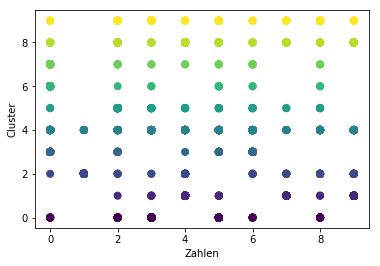

In [11]:
#Scatter-Plot, Zahlen gegen Cluster aufgetragen, Dotgröße je nach Wahrscheinlichkeit dargestellt

size = 50 * mixture_probs.max(1) ** 2

plt.scatter(cleaned_data[0],cleaned_data_mixture['Cluster'], s=size, c=cleaned_data_mixture['Cluster'])
plt.xlabel("Zahlen")
plt.ylabel("Cluster")
plt.show()

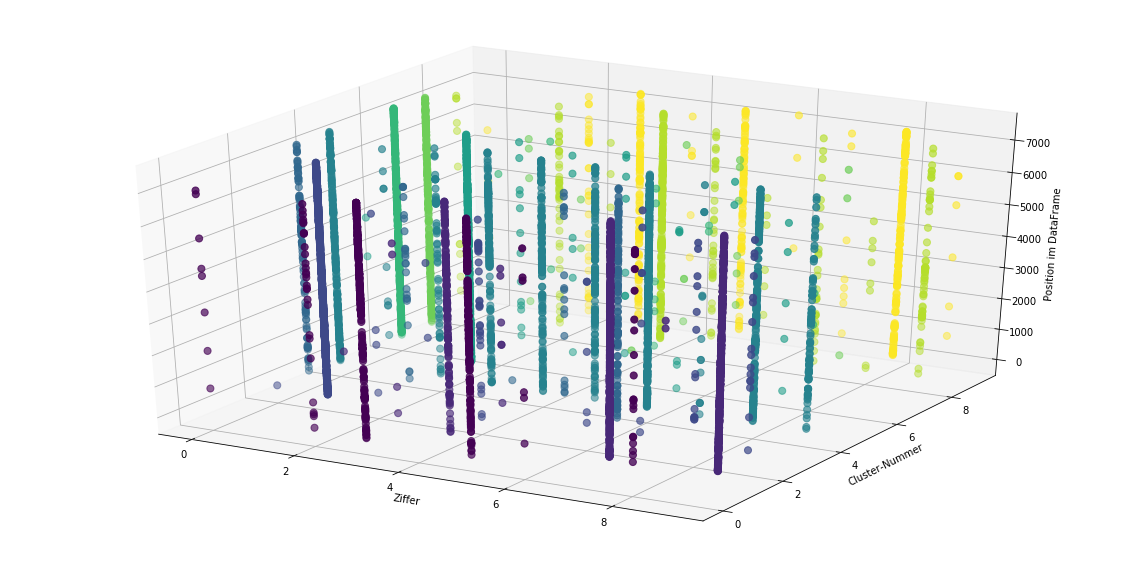

In [12]:
#3D-Blot, z-Achse die Anzahl aller einzelnen Zahlen, Dotgröße nach Wahrscheinlichkeit

z_werte = range(0,7291)

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection = '3d')
ax.scatter3D(cleaned_data[0],cleaned_data_mixture['Cluster'], z_werte, s=size, c=cleaned_data_mixture['Cluster'])
ax.set_xlabel('Ziffer')
ax.set_ylabel('Cluster-Nummer')
ax.set_zlabel('Position im DataFrame')
plt.show()

In [13]:
#ziehe aus dem df cleaned_data alle Zeilen, die in der 1. Spalte (0) die Zahl 0 stehen haben und grupiere die Zeilen
#nach den zugeordneten Clustern ('mixture'), dann zähle, wie viele Zeilen es zu jedem Cluster gibt und gebe das in einem
#df raus, gebe vom df nur die erste Spalte raus, da die restlichen nicht von Bedeutung sind
cleaned_data_mixture[cleaned_data_mixture[0] == 0].groupby("Cluster").count()[0].keys()

Int64Index([0, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='Cluster')

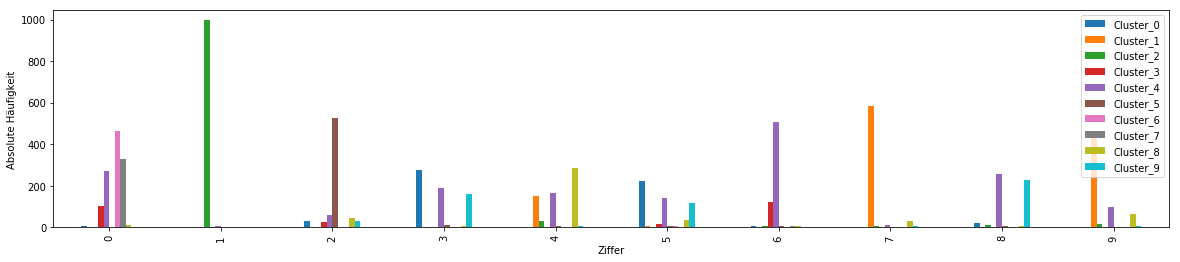

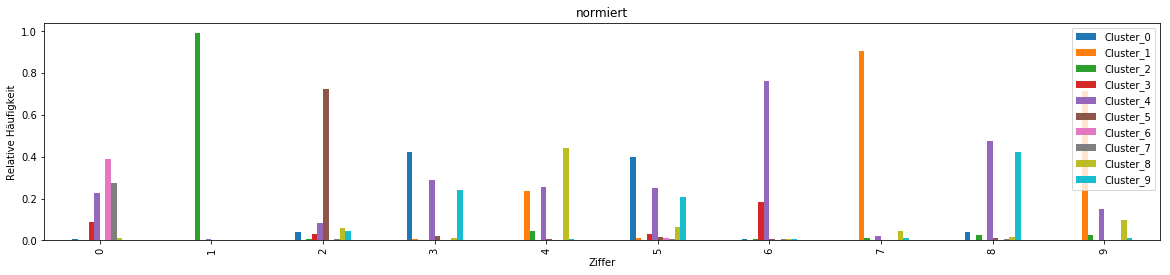

In [14]:
def clusters_vs_numbers(df):
    bar_data = np.zeros((10,10))
    for digit in range(0,10): #für jede Zahl zwischen 0 und 10
        temp_result = df[df[0] == digit].groupby('Cluster').count()[0]
        cluster_keys = temp_result.keys() #gibt mir den Index (erste Spalte) für temp_results als Liste raus
        for cluster_idx in cluster_keys: #für jeden Cluster in der Cluster-Sammlung (cluster_keys)...
            bar_data[digit][cluster_idx] = temp_result[cluster_idx]
    col_names = []
    for cluster_idx in range(0,10):
        col_names.append('Cluster_' + str(cluster_idx))
    return pd.DataFrame(bar_data, columns=col_names)

df_mixture = clusters_vs_numbers(cleaned_data_mixture)

def bar_plot(df):
    t_df = df.transpose()
    normiert = df.divide(df.sum(1), axis=0)
    df.plot.bar(figsize=(20,4))
    plt.xlabel("Ziffer")
    plt.ylabel("Absolute Häufigkeit")
    normiert.plot.bar(figsize=(20,4))
    plt.xlabel("Ziffer")
    plt.ylabel("Relative Häufigkeit")
    plt.title("normiert")
    return plt.show()

bar_plot(df_mixture)
   

# Clustering nach KMeans

In [15]:
#Durchfühurg von KMeans
cleaned_data_kmeans = pd.DataFrame.copy(cleaned_data, deep=True)
kmeans = KMeans(n_clusters=10,n_init=1).fit(superclean_data)
cleaned_data_kmeans['Cluster'] = kmeans.predict(superclean_data)
cleaned_data_kmeans.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,Cluster
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,2
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,3
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,6
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,3


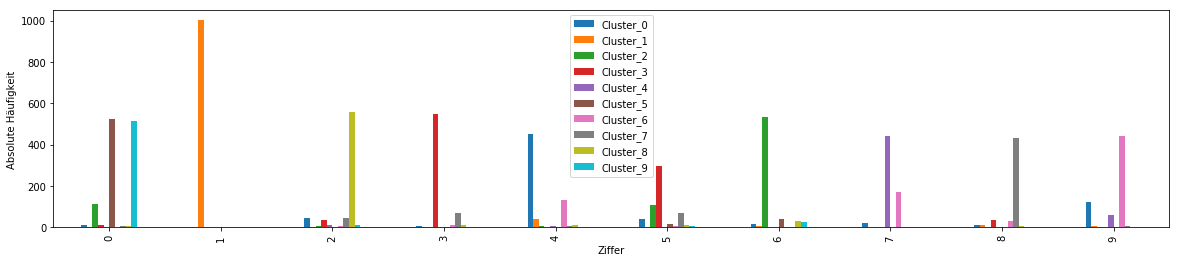

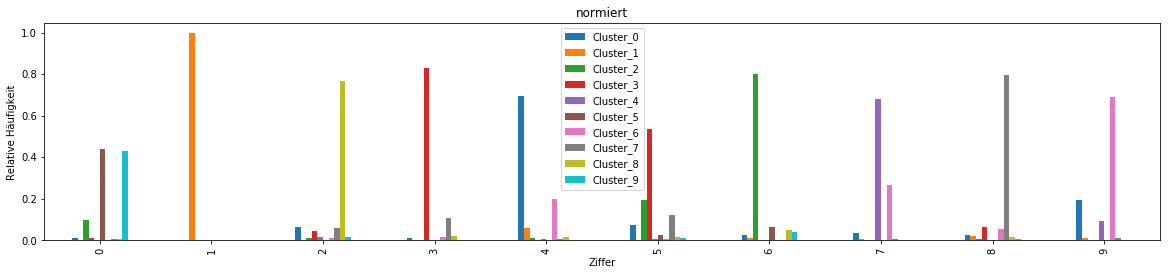

In [16]:
df_kmeans = clusters_vs_numbers(cleaned_data_kmeans)

bar_plot(df_kmeans)

# Vergleich von Gaussian and KMeans

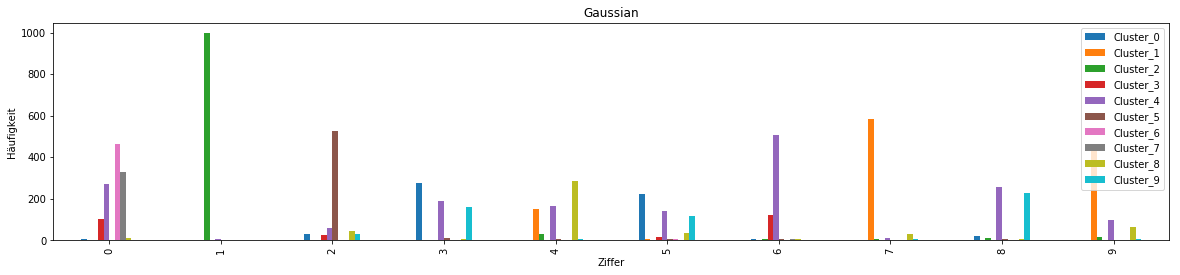

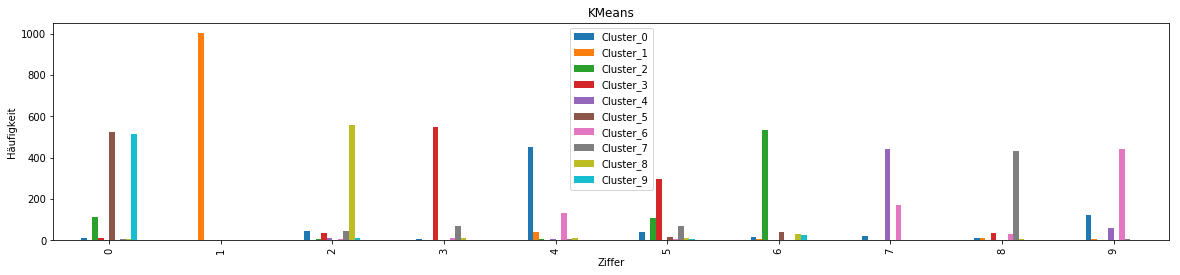

In [17]:
df_mixture.plot.bar(figsize=(20,4))
plt.xlabel("Ziffer")
plt.ylabel("Häufigkeit")
plt.title("Gaussian")

df_kmeans.plot.bar(figsize=(20,4))
plt.xlabel("Ziffer")
plt.ylabel("Häufigkeit")
plt.title("KMeans")

plt.show()

# Optimierung von KMeans durch Angabe der Mediane als Startpunke

In [18]:
cleaned_data_kmeans_mediane = pd.DataFrame.copy(cleaned_data, deep=True)
np_mediane = np.asarray(mediane)

kmeans_mediane = KMeans(n_clusters=10,n_init=1, init=np_mediane).fit(superclean_data)
cleaned_data_kmeans_mediane['Cluster'] = kmeans_mediane.predict(superclean_data)
cleaned_data_kmeans_mediane.head()


,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,Cluster
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,5
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,4
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,9
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,3


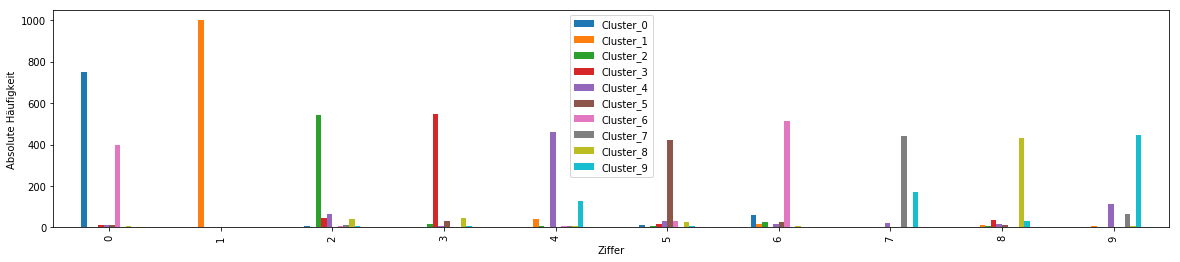

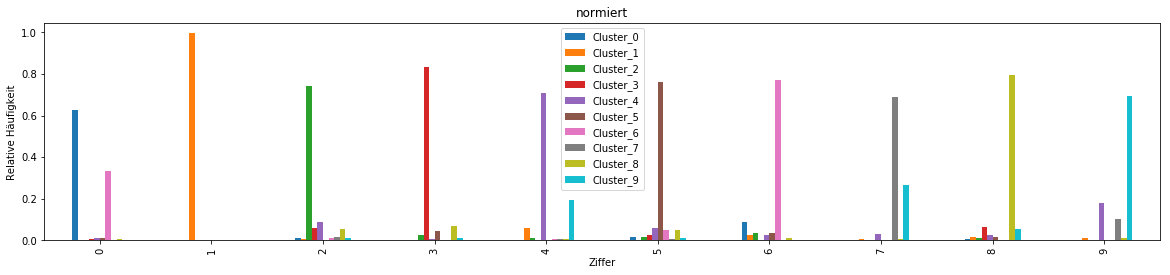

In [19]:
df_kmeans_mediane = clusters_vs_numbers(cleaned_data_kmeans_mediane)
bar_plot(df_kmeans_mediane)

# Vergleich von KMeans und KMeans mit Angabe der Mediane als Startpunkte

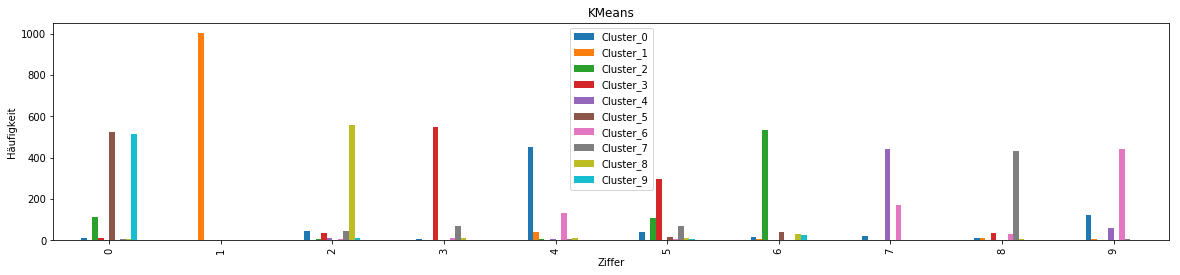

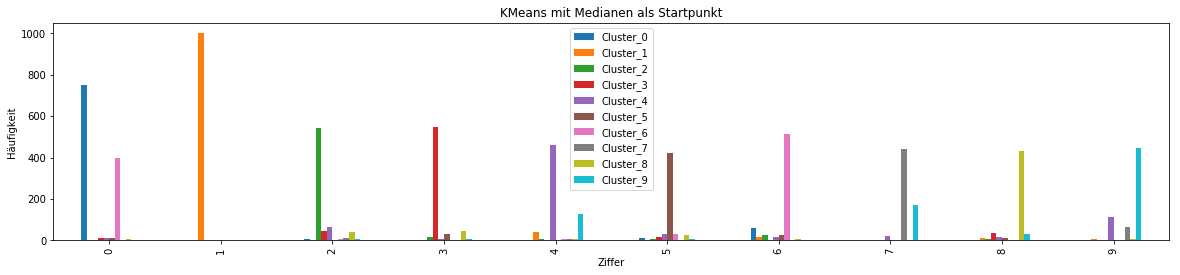

In [20]:
df_kmeans.plot.bar(figsize=(20,4))
plt.xlabel("Ziffer")
plt.ylabel("Häufigkeit")
plt.title("KMeans")

df_kmeans_mediane.plot.bar(figsize=(20,4))
plt.xlabel("Ziffer")
plt.ylabel("Häufigkeit")
plt.title("KMeans mit Medianen als Startpunkt")

plt.show()

In [21]:
def Zahlen(K):
    fig, ax = plt.subplots(2, 5, figsize=(8,3))
    centers = K.cluster_centers_.reshape(10,16,16)
    for axi, center in zip(ax.flat, centers):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation=None, cmap=plt.cm.binary)

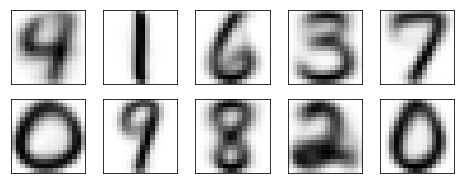

In [22]:
# Zuordnung der Zahlen nach KMeans
Zahlen(kmeans)

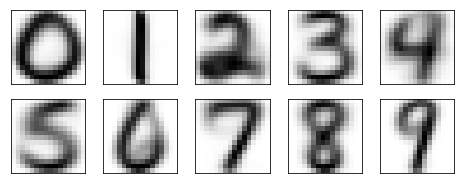

In [23]:
# Zuordnung der Zahlen nach KMeans, wenn Mediane als Startpunkt angegeben
Zahlen(kmeans_mediane)

# Vorbearbeitung der Daten mit t-SNE 

In [24]:
cleaned_data_kmeans_tsne = pd.DataFrame.copy(cleaned_data, deep=True)

In [26]:
tsne = TSNE(n_components=2, init='random', random_state=0,n_iter=250)
digits_proj = tsne.fit_transform(superclean_data)

kmeans_tsne = KMeans(n_clusters=10, random_state=0)
clusters_tsne = kmeans_tsne.fit_predict(digits_proj)

KeyboardInterrupt: 

In [27]:
cleaned_data_kmeans_tsne['Cluster'] = pd.Series(clusters_tsne, index=cleaned_data_kmeans_tsne.index)
cleaned_data_kmeans_tsne.head()

NameError: name 'clusters_tsne' is not defined

In [ ]:
df_kmeans_tsne = clusters_vs_numbers(cleaned_data_kmeans_tsne)
bar_plot(df_kmeans_tsne)

# Vergleich von KMeans mit KMeans nach t-SNE und KMeans mit Medianen als Startpunkte

NameError: name 'df_kmeans_tsne' is not defined

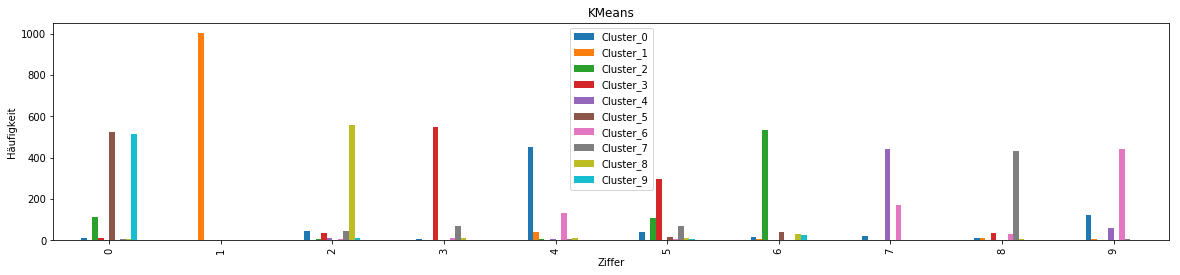

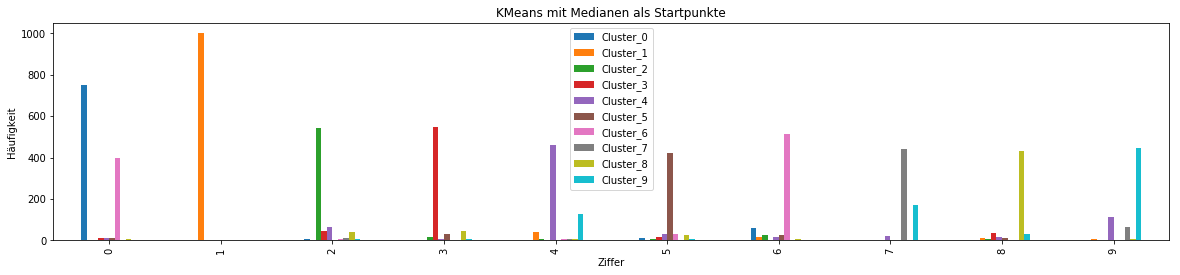

In [28]:
df_kmeans.plot.bar(figsize=(20,4))
plt.xlabel("Ziffer")
plt.ylabel("Häufigkeit")
plt.title("KMeans")

df_kmeans_mediane.plot.bar(figsize=(20,4))
plt.xlabel("Ziffer")
plt.ylabel("Häufigkeit")
plt.title("KMeans mit Medianen als Startpunkte")

df_kmeans_tsne.plot.bar(figsize=(20,4))
plt.xlabel("Ziffer")
plt.ylabel("Häufigkeit")
plt.title("KMeans nach t-SNE")

plt.show()

In [29]:
clusters_kmeans = cleaned_data_kmeans['Cluster']
clusters_mediane = cleaned_data_kmeans_mediane['Cluster']

In [30]:
df.iloc[:,257]

NameError: name 'df' is not defined

In [ ]:
def acc_score(df,clusters):
    data = df.iloc[:,257]
    target = df.iloc[:,0]
    ziffer_cluster = sklearn.datasets.base.Bunch(data=data, target=target)
    labels = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        labels[mask] = mode(ziffer_cluster.target[mask])[0]
    return accuracy_score(ziffer_cluster.target, labels)

results_clustering = [[cleaned_data_kmeans, clusters_kmeans], [cleaned_data_kmeans_mediane, clusters_mediane], [cleaned_data_kmeans_tsne, clusters_tsne]]
scores = []

for df, cluster in results_clustering:
    scores.append(acc_score(df,cluster))

In [ ]:
x_Werte = [1,2,3]

plt.bar(x_Werte, scores)
plt.xlabel("Verfahren")
plt.ylabel("Accuracy")
plt.xticks((1,2,3),["KMeans","Mediane","t-SNE"])
plt.title("KMeans Clustering im Vergleich")
plt.show()